#### Análisis exploratorio de los datos (EDA)

Ahora con los datos limpios, es hora de investigar las relaciones que hay entre las variables del dataset, ver si hay outliers o anomalías (que no tienen que ser errores necesariamente), y ver si hay algún patrón interesante que valga la pena explorar en un análisis posterior. 

Se implementa una nube de palabras que dan una buena idea de cuáles palabras son más frecuentes en los títulos.

In [19]:
# Librerías usadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

### El dataset contiene las siguientes columnas:

- **user_id**: Identificador del usuario.

- **item_id**: Identificador del juego.

- **sentiment**: Sentimiento del usuario hacia el juego (1, 2 o algún otro valor).

- **items_count**: Número de juegos que posee el usuario.

- **playtime_forever**: Tiempo total jugado.

- **genres**: Géneros del juego.

- **app_name**: Nombre del juego.

- **price**: Precio del juego.

- **developer**: Desarrollador del juego.

- **release_year**: Año de lanzamiento del juego.

### Estadísticas Descriptivas

In [20]:
# Cargar el dataset
file_path = '..//src/data/dataset_full.csv'
df = pd.read_csv(file_path)

# Estadísticas descriptivas
descriptive_stats = df.describe()
descriptive_stats.T


,count,mean,std,min,25%,50%,75%,max
item_id,35336.0,212468.038629,117179.949153,10.0,109600.0,236090.00,301520.00,521570.00
sentiment,35336.0,1.309231,0.694600,0.0,1.0,1.00,2.00,2.00
items_count,35336.0,119.244085,211.135459,1.0,45.0,80.00,136.00,7762.00
playtime_forever,35336.0,9749.399055,24151.555826,0.0,450.0,1811.00,7830.50,642773.00
price,35336.0,13.807119,14.340245,0.0,0.0,9.99,19.99,189.96
release_year,35336.0,2003.348653,140.141307,0.0,2012.0,2013.00,2015.00,2017.00


*Observaciones*

- **item_id**: Varía significativamente, lo cual es esperado ya que son identificadores únicos.

- **sentiment**: La media es ligeramente superior a 1, lo que podría indicar una inclinación de sentimientos neutrales a positivos.

- **items_count**: Hay usuarios con una cantidad muy variada de juegos, con un promedio de alrededor de 118 juegos y un máximo de 7762 juegos.

- **playtime_forever**: El tiempo de juego varía ampliamente, con un promedio de alrededor de 12,676 minutos. Hay valores extremadamente altos, como se ve en el valor máximo de 642,773 minutos.

- **price**: El precio de los juegos varía, con un promedio de unos 14.34 USD y un máximo de 189.96 USD.

- **release_year**: Los años de lanzamiento se centran principalmente en torno a los años recientes, con una media de 2012.

### Análisis de Outliers

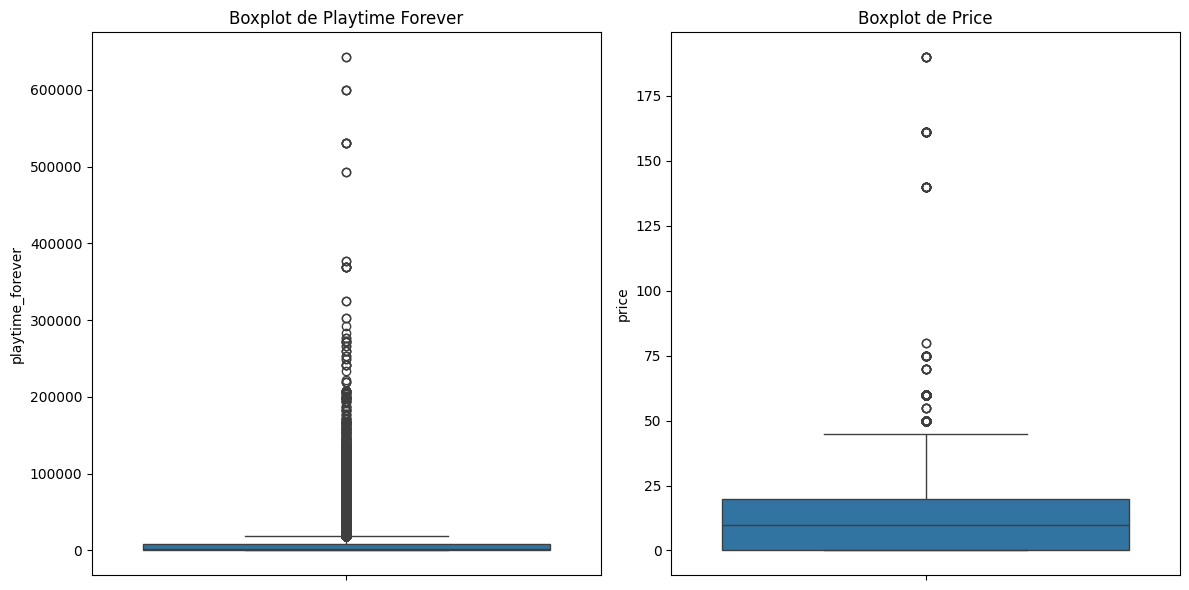

In [21]:
# Análisis de outliers para 'playtime_forever' y 'price'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['playtime_forever'])
plt.title('Boxplot de Playtime Forever')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['price'])
plt.title('Boxplot de Price')

plt.tight_layout()
plt.show()

-  **playtime_forever**: El boxplot muestra una gran cantidad de outliers, lo que indica que algunos usuarios han pasado una cantidad  muy alta de tiempo en ciertos juegos.

- **price**: También presenta algunos outliers, aunque en menor medida que el playtime_forever.

### Análisis de las variables categóricas

In [22]:
# Análisis de las variables categóricas
genres_count = Counter(df['genres'])
developers_count = Counter(df['developer'])
release_year_count = Counter(df['release_year'])

# Mostrar los resultados del análisis categórico
genres_count.most_common(5), developers_count.most_common(5), release_year_count.most_common(5)

([('Action', 10425),
  ('Indie', 6519),
  ('Adventure', 4002),
  ('RPG', 3047),
  ('Free to Play', 2476)],
 [('Facepunch Studios', 3196),
  ('Valve', 2602),
  ('Smartly Dressed Games', 1790),
  ('Bohemia Interactive', 1614),
  ('Re-Logic', 1080)],
 [(2013.0, 6732),
  (2012.0, 5410),
  (2015.0, 5307),
  (2014.0, 4958),
  (2017.0, 3615)])

*Observaciones*

- **Géneros (genres):** El género más común es 'Acción', seguido por 'Indie' y 'Aventura'. Esto indica la preferencia de la muestra que estamos usando para el análisis y que posiblemente incidirá en la recomendación.

- **Desarrolladores (developer):** 'Facepunch Studios' aparece como el desarrollador más común, seguido por 'Valve' y 'Bohemia Interactive'. Esto refleja la popularidad de sus juegos en la plataforma STEAM.

- **Año de Lanzamiento (release_year):** Hay una concentración significativa de juegos lanzados en los años 2012 y 2013. Esto indica una tendencia en la producción o popularidad de juegos durante esos dos años.

### Nube de palabras para los títulos de los juegos

La nube de palabras muestra las palabras más frecuentes en los nombres de los juegos. El tamaño de la palabra indica mayor frecuencia. Este tipo de visualización es útil para obtener una rápida impresión de los temas o palabras clave más comunes en los títulos de los juegos.

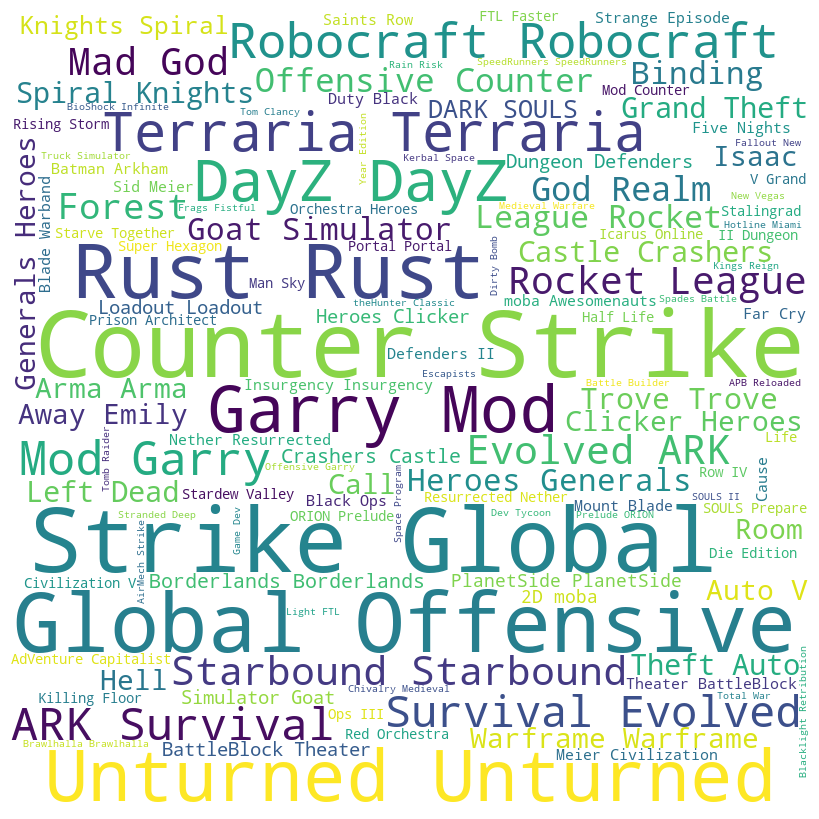

In [23]:
# Creando una nube de palabras para 'app_name'
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(" ".join(df['app_name']))

# Mostrar la nube de palabras
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

Por el tamaño de las palabras podemos inferir que los juegos más comunes en el título de los juegos son:

- GLobal Offensive
- Counter Strike
- Strike Global
- Unturned
- Rust

Entre otros que se aprecian en la nube

### Matriz de Correlación

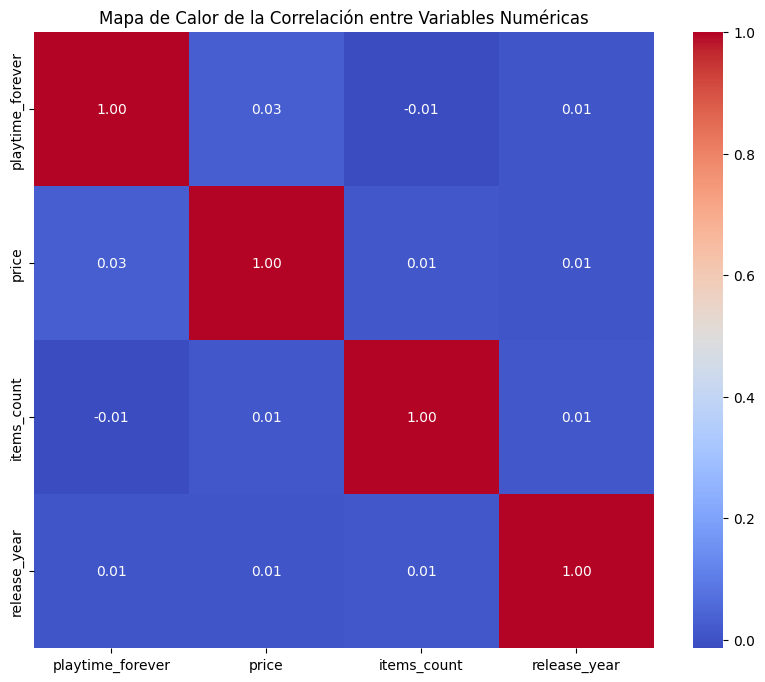

In [24]:
# Calculando la matriz de correlación
correlation_matrix = df[['playtime_forever', 'price', 'items_count', 'release_year']].corr()

# Creando el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Calor de la Correlación entre Variables Numéricas")
plt.show()

*Observaciones*

- playtime_forever y items_count: Existe una correlación negativa muy débil entre el tiempo total jugado y la cantidad de juegos que posee un usuario. Esto sugiere que, en general, hay una ligera tendencia a que los usuarios con más juegos (items_count) tengan un menor tiempo total jugado por juego (playtime_forever), pero la relación es muy tenue.

- playtime_forever y price: La correlación entre el tiempo de juego y el precio del juego es muy baja. Esto indica que el precio de un juego no está fuertemente relacionado con la cantidad de tiempo que los usuarios pasan jugándolo.

- price y items_count: La correlación entre el precio y la cantidad de juegos que posee un usuario también es baja, lo que sugiere que no hay una relación fuerte entre cuánto gasta un usuario en juegos y cuántos juegos posee.

- release_year: Las correlaciones con el año de lanzamiento son generalmente bajas, lo que indica que el año de lanzamiento del juego no tiene una relación fuerte con el tiempo de juego, el precio o la cantidad de juegos que un usuario posee.

### Análisis de géneros

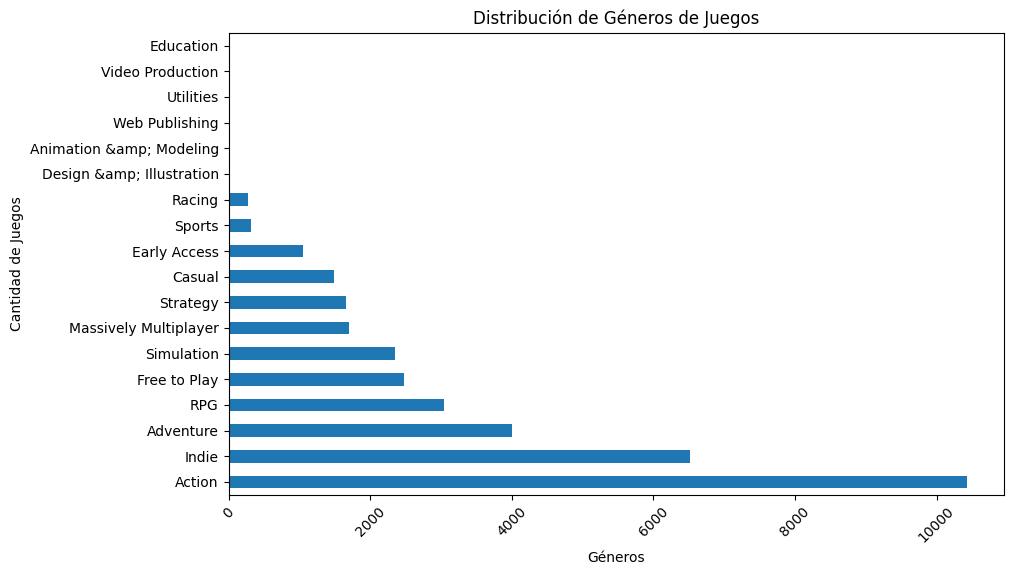

genres
Action                   10425
Indie                     6519
Adventure                 4002
RPG                       3047
Free to Play              2476
Simulation                2346
Massively Multiplayer     1708
Strategy                  1662
Casual                    1486
Early Access              1052
Name: count, dtype: int64

In [25]:
# Análisis detallado de géneros
genre_counts = df['genres'].value_counts()

# Visualización de la distribución de géneros
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='barh')
plt.title('Distribución de Géneros de Juegos')
plt.xlabel('Géneros')
plt.ylabel('Cantidad de Juegos')
plt.xticks(rotation=45)
plt.show()

genre_counts.head(10)  # Mostrar los 10 géneros más comunes

*Observaciones*

- Predominio del Género 'Acción': Este género domina claramente en términos de cantidad de juegos, lo que sugiere una alta popularidad entre los usuarios.

- Otros Géneros Populares: 'Indie', 'Aventura' y 'Casual' siguen en términos de popularidad, aunque a una distancia considerable del género 'Acción'.

- Géneros Menos Comunes: Géneros como 'Racing' y 'Massively Multiplayer' aparecen menos frecuentemente en el dataset.

### Análisis de los desarrolladores

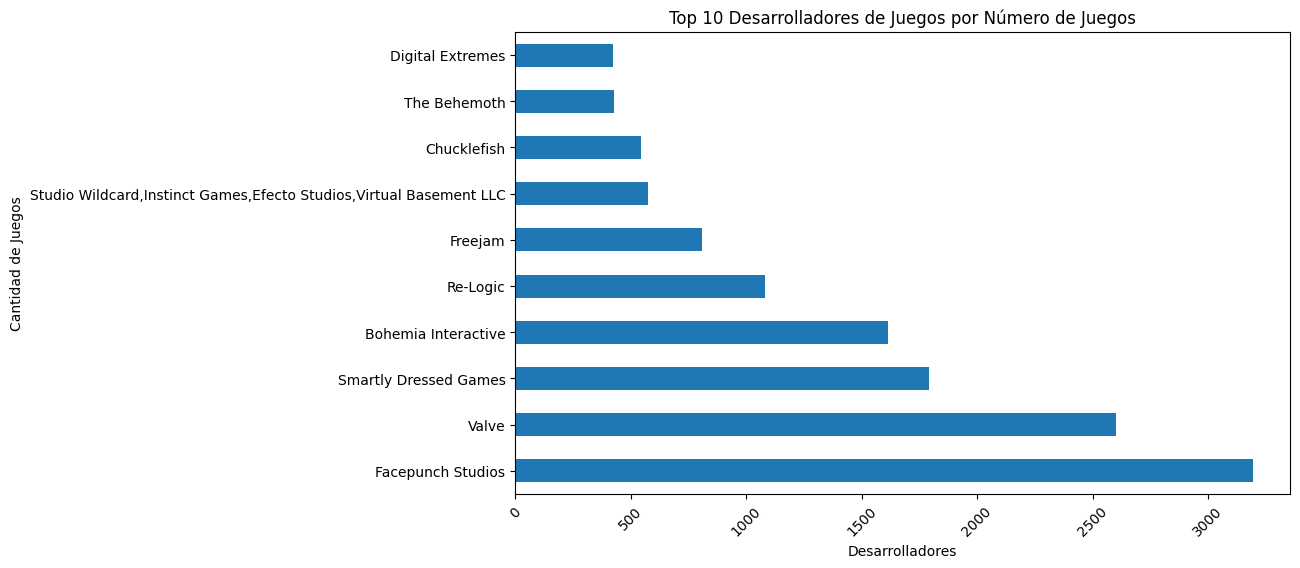

developer
Facepunch Studios                                                     3196
Valve                                                                 2602
Smartly Dressed Games                                                 1790
Bohemia Interactive                                                   1614
Re-Logic                                                              1080
Freejam                                                                810
Studio Wildcard,Instinct Games,Efecto Studios,Virtual Basement LLC     574
Chucklefish                                                            545
The Behemoth                                                           428
Digital Extremes                                                       424
Name: count, dtype: int64

In [26]:
# Análisis detallado de desarrolladores
developer_counts = df['developer'].value_counts()

# Visualización de la distribución de desarrolladores
plt.figure(figsize=(10, 6))
developer_counts.head(10).plot(kind='barh')  # Mostrando solo los 10 desarrolladores más comunes
plt.title('Top 10 Desarrolladores de Juegos por Número de Juegos')
plt.xlabel('Desarrolladores')
plt.ylabel('Cantidad de Juegos')
plt.xticks(rotation=45)
plt.show()

developer_counts.head(10)  # Mostrar los 10 desarrolladores más comunes

*Observaciones*

- Dominio de 'Facepunch Studios': 'Facepunch Studios' es, con alguna diferencia, el desarrollador más común en el dataset, lo que sugiere una gran popularidad de sus juegos entre los usuarios.

- Presencia de otros desarrolladores populares: 'Valve', 'Bohemia Interactive', y 'Smartly Dressed Games' también tienen una presencia significativa, aunque mucho menor en comparación con 'Facepunch Studios'.

- Diversidad entre los principales desarrolladores: Hay una variedad de desarrolladores en el top 10, lo que indica una diversidad en los juegos preferidos por los usuarios.

### Análisis de Tendencias a lo Largo del Tiempo (Año de Lanzamiento)

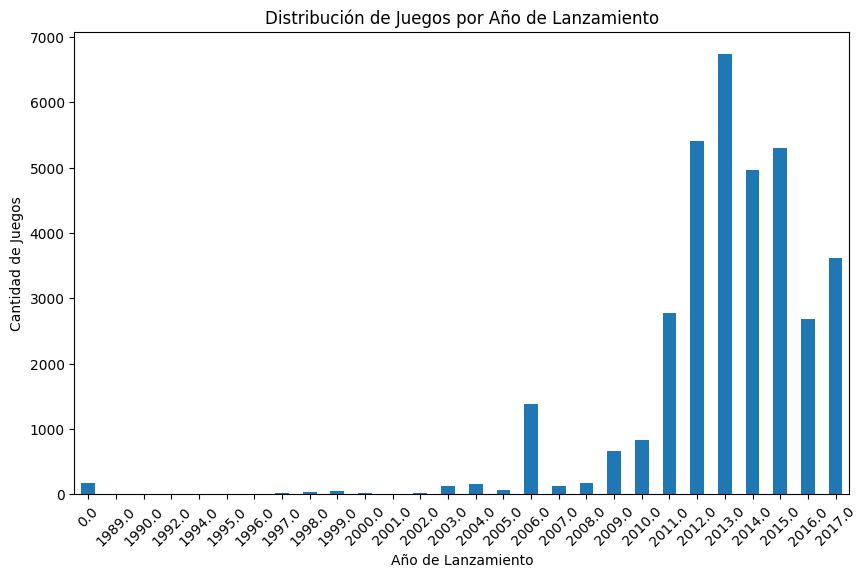

release_year
0.0        172
1989.0       2
1990.0       1
1992.0       4
1994.0       3
1995.0       4
1996.0       4
1997.0      15
1998.0      32
1999.0      49
2000.0      24
2001.0       6
2002.0      16
2003.0     124
2004.0     158
2005.0      64
2006.0    1379
2007.0     134
2008.0     170
2009.0     659
2010.0     838
2011.0    2769
2012.0    5410
2013.0    6732
2014.0    4958
2015.0    5307
2016.0    2687
2017.0    3615
Name: count, dtype: int64

In [27]:
# Análisis de tendencias a lo largo del tiempo (año de lanzamiento)
release_year_counts = df['release_year'].value_counts().sort_index()

# Visualización de la distribución de años de lanzamiento
plt.figure(figsize=(10, 6))
release_year_counts.plot(kind='bar')
plt.title('Distribución de Juegos por Año de Lanzamiento')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Juegos')
plt.xticks(rotation=45)
plt.show()

release_year_counts  # Mostrar la distribución de años de lanzamiento

*Observaciones*

- Pico en 2012 y 2013: hay un notable pico en la cantidad de juegos lanzados en los años 2012 y 2013. Esto podría deberse a un aumento en la producción de juegos o a una mayor adopción de la plataforma STEAM por parte de los desarrolladores y usuarios.

- Crecimiento sostenido desde mediados de los 2000: a partir de mediados de la década del 2000, se observa un crecimiento sostenido en el número de juegos lanzados cada año, alcanzando su punto máximo en 2012-2013.

- Variedad en los años anteriores: los años anteriores a 2000 muestran una menor cantidad de juegos, lo cual es esperable dada la evolución de la industria de los videojuegos y la tecnología.